In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    compress_repeated_epochs,
)
from ripple_heterogeneity.place_cells import place_cells_run, fields
import statistics
import nelpy as nel
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import pickle
import glob
from skimage import measure



C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [3]:
functions.set_plotting_defaults()

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [4]:
basepath = r"Z:\\Data\\Kenji\\ec013.656_674"
results = place_cells_run.run(basepath, n_shuff=20)


no spk data in epoch


In [5]:
results.keys()


dict_keys(['df', 'ratemaps', 'occupancies', 'x', 'y', 'ts', 'st'])

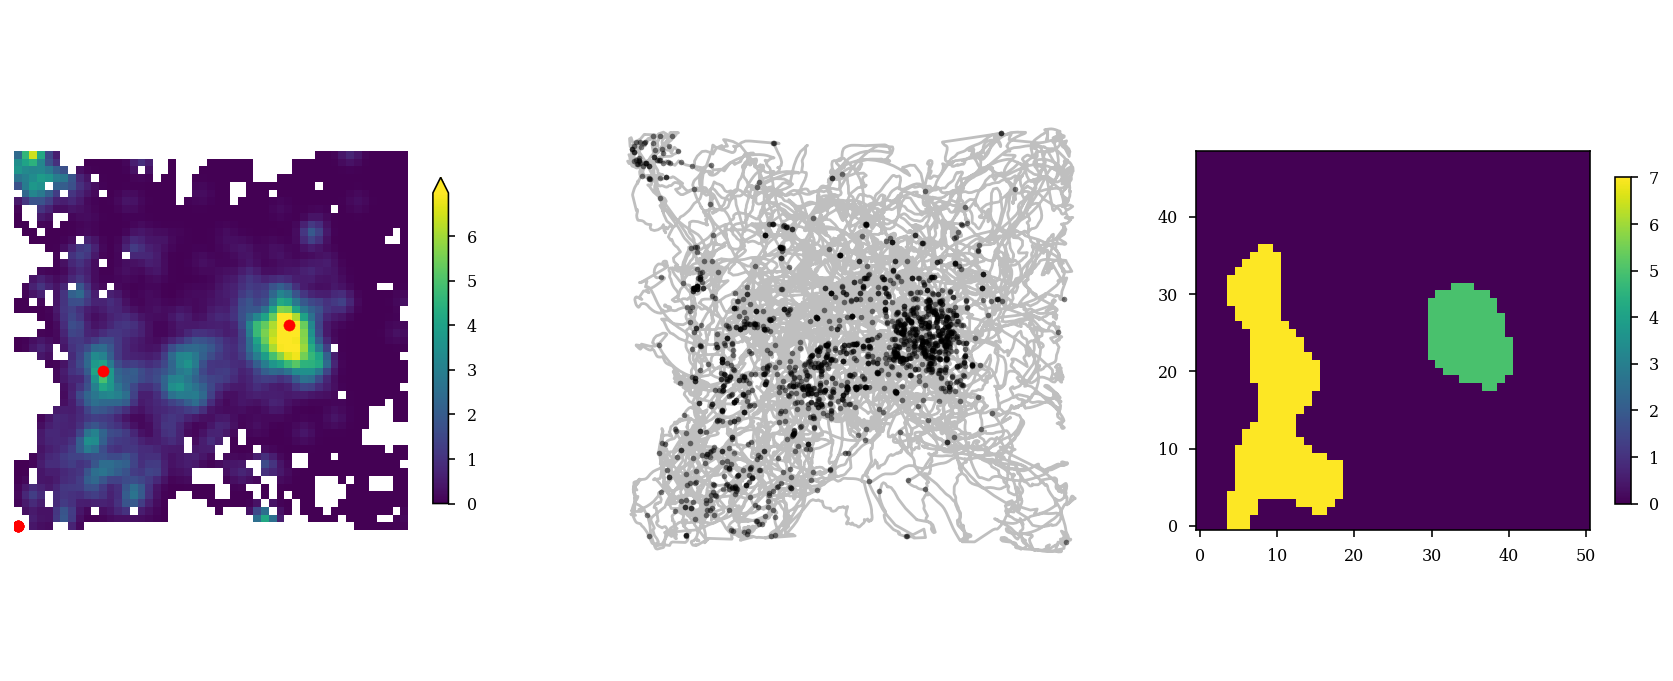

In [35]:
# plt.plot(results['x'][0], results['ts'][0])
# plt.show()
st = results["st"]
x = results["x"][0]
y = results["y"][0]
ts = results["ts"][0]
i = 7
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

ratemap_ = results["ratemaps"][i].copy()
ratemap_[results["occupancies"][i] < 0.01] = np.nan
shw = ax[0].imshow(
    ratemap_, interpolation="nearest", origin="lower", vmax=np.nanmax(ratemap_) * 0.8
)
fig.colorbar(shw, ax=ax[0], extend="max", shrink=0.5)

ax[1].plot(x, y, color="grey", alpha=0.5)
ax[1].plot(
    np.interp(results["st"][i], ts, x),
    np.interp(results["st"][i], ts, y),
    ".k",
    alpha=0.5,
)
ax[1].axis("equal")
ax[1].axis("off")
ax[0].axis("equal")
ax[0].axis("off")

peaks = fields.separate_fields_by_laplace_of_gaussian(
    np.array(results["ratemaps"][i]), sigma=3, minimum_field_area=100
)
shw = ax[2].imshow(
    peaks, interpolation="nearest", origin="lower"
)
fig.colorbar(shw, ax=ax[2], shrink=0.5)

bc = fields.calculate_field_centers(
    np.array(results["ratemaps"][i]), peaks, center_method="maxima"
)
# plt.imshow(peaks)
for x, y in bc:
    ax[0].scatter(x, y, color="red")
# peaks = fields.find_peaks(ratemap_)
# peaks = separate_fields_by_laplace(ratemap_, threshold=0, minimum_field_area=None)
# for x,y in peaks:
#     ax[0].scatter(y,x,color='red')


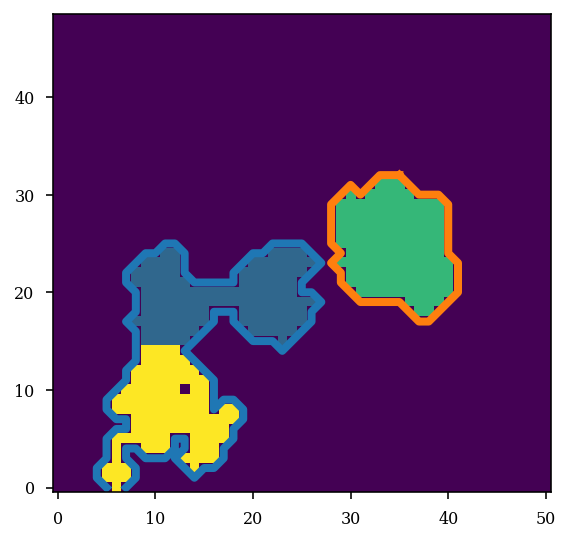

In [27]:
peaks = fields.compute_2d_place_fields(np.array(results["ratemaps"][i]), min_firing_rate=1, thresh=0.2,
                            min_size=100)
plt.imshow(peaks, interpolation="nearest", origin="lower")

bc = measure.find_contours(peaks, 0, fully_connected='low', positive_orientation='low')
for c in bc:
    plt.plot(c[:, 1], c[:, 0],linewidth=4)

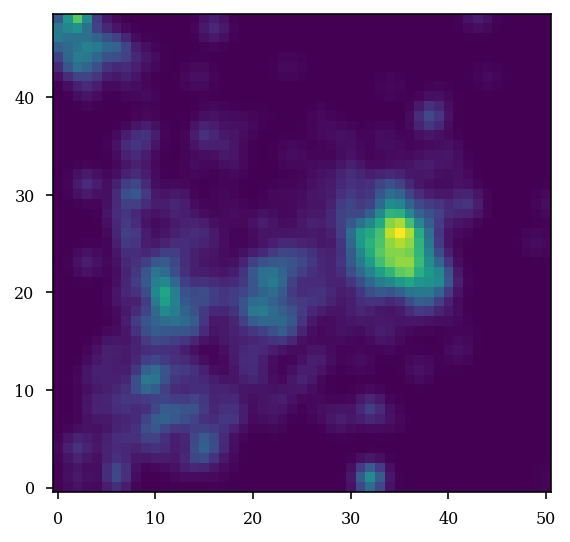

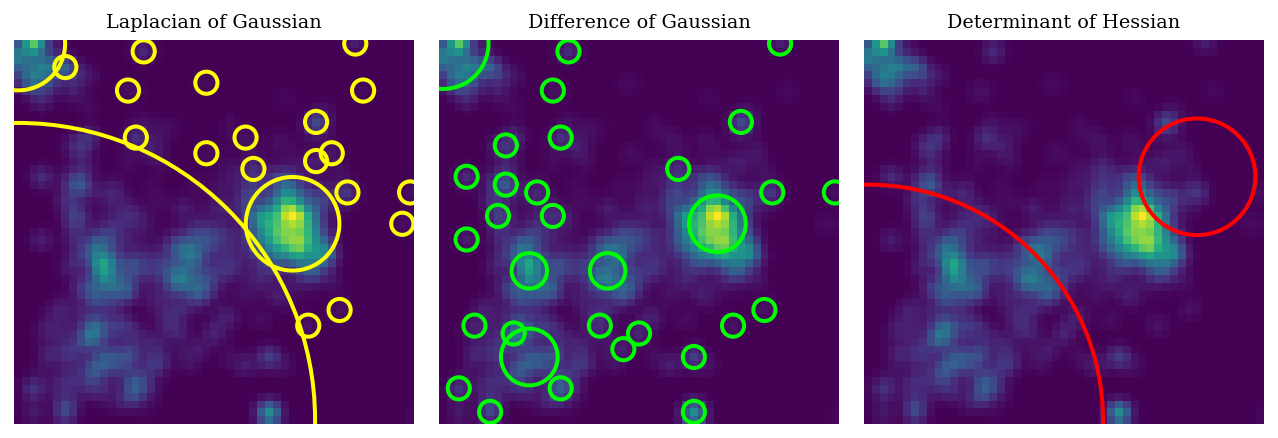

In [7]:
fields.detect_firing_fields(
    np.array(results["ratemaps"][i])
)


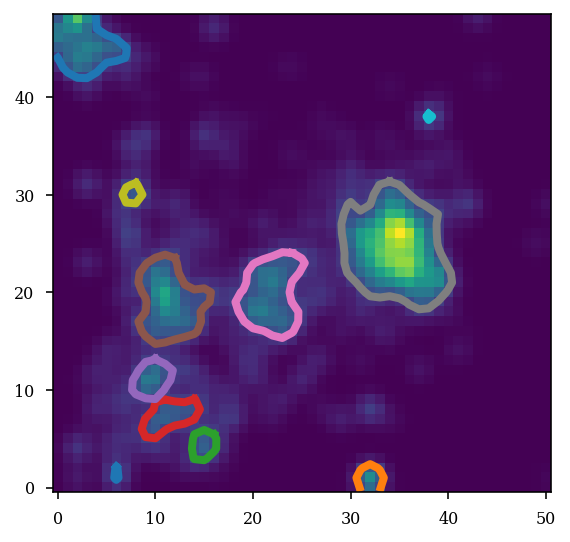

In [10]:
ratmap = np.array(results["ratemaps"][i])

plt.imshow(ratmap, interpolation="nearest", origin="lower")

# test = fields.sort_fields_by_rate(ratmap, ratmap>ratmap.max()*.2)
# plt.imshow(test, interpolation="nearest", origin="lower")

bc = measure.find_contours(ratmap, ratmap.max()*.2, fully_connected='low', positive_orientation='low')
for c in bc:
    plt.plot(c[:, 1], c[:, 0],linewidth=4)

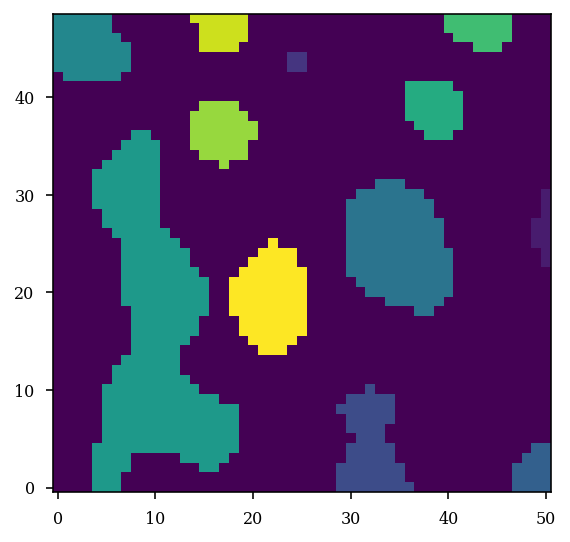

In [8]:
peaks = fields.separate_fields_by_laplace_of_gaussian(
    np.array(results["ratemaps"][i]), sigma=3
)
# peaks = fields.sort_fields_by_rate(np.array(results["ratemaps"][i]), peaks, np.max)

plt.imshow(peaks, interpolation="nearest", origin="lower")


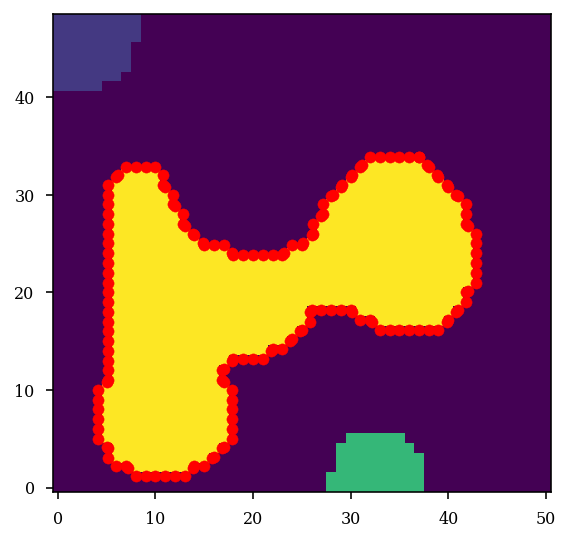

In [12]:
from skimage import measure
peaks = fields.separate_fields_by_laplace_of_gaussian(
    np.array(results["ratemaps"][i]), sigma=5, minimum_field_area=10
)

bc = measure.find_contours(peaks, 1, fully_connected='low', positive_orientation='low')

plt.imshow(peaks, interpolation="nearest", origin="lower")
for x, y in bc[-1]:
    plt.scatter(y, x, color="red")

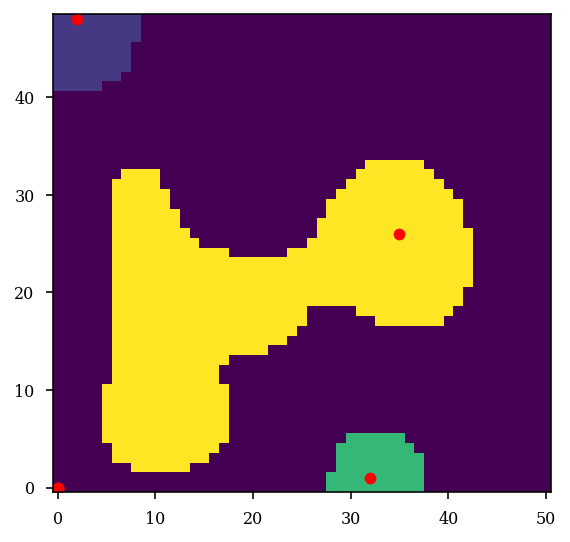

In [13]:
# peaks = fields.separate_fields_by_laplace(
#     np.array(results["ratemaps"][i]), threshold=.1, minimum_field_area=10
# )
# peaks = fields.separate_fields_by_dilation(
#     np.array(results["ratemaps"][i]), seed=2.5, sigma=4, minimum_field_area=10
# )
peaks = fields.separate_fields_by_laplace_of_gaussian(
    np.array(results["ratemaps"][i]), sigma=5, minimum_field_area=10
)
# peaks = fields.sort_fields_by_rate(np.array(results['ratemaps'][i]), peaks)
bc = fields.calculate_field_centers(
    np.array(results["ratemaps"][i]), peaks, center_method="maxima"
)
plt.imshow(peaks, interpolation="nearest", origin="lower")
for x, y in bc:
    plt.scatter(x, y, color="red")
